In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer  # Eksik değerleri doldurmak için
from sklearn.experimental import enable_iterative_imputer  # Enable IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler  # Sayısal veriyi ölçeklemek için
from sklearn.preprocessing import OneHotEncoder  # Kategorik veriyi kodlamak için
from sklearn.compose import ColumnTransformer






In [2]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
smp_submission_df = pd.read_csv("sample_submission.csv")

train_df = train.copy()
test_df = test.copy()

# Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is a critical step in any data project. It allows us to understand, summarize, and visualize the dataset effectively, paving the way for further analysis or modeling.

***🎯 Objectives***  
🕵️‍♀️ Gain insights into the data.  
📊 Visualize distributions, relationships, and patterns.  
🧹 Identify missing values, outliers, and data inconsistencies.etection.  

**Let’s dive into the EDA! 🚀**



## 📜 Dataset Overview


In [3]:
# Check datasets dimensions 
print(f"Train Dataset contains {train_df.shape[0]} rows and {train_df.shape[1]} columns.")
print(f"\nTest Dataset contains {test_df.shape[0]} rows and {test_df.shape[1]} columns.")
train_df.head()

Train Dataset contains 1200000 rows and 21 columns.

Test Dataset contains 800000 rows and 20 columns.


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

**Checking Missing values**

In [5]:
print(f"---Train data missing values: \n{train_df.isnull().sum()*100 / len(train_df)}") # percentage of missing values
print("--"*50)
print(f"---Test data missing values: \n{test_df.isnull().sum()*100 / len(test_df)}")

---Train data missing values: 
id                       0.000000
Age                      1.558750
Gender                   0.000000
Annual Income            3.745750
Marital Status           1.544083
Number of Dependents     9.139333
Education Level          0.000000
Occupation              29.839583
Health Score             6.173000
Location                 0.000000
Policy Type              0.000000
Previous Claims         30.335750
Vehicle Age              0.000500
Credit Score            11.490167
Insurance Duration       0.000083
Policy Start Date        0.000000
Customer Feedback        6.485333
Smoking Status           0.000000
Exercise Frequency       0.000000
Property Type            0.000000
Premium Amount           0.000000
dtype: float64
----------------------------------------------------------------------------------------------------
---Test data missing values: 
id                       0.000000
Age                      1.561125
Gender                   0.000000
Annual 

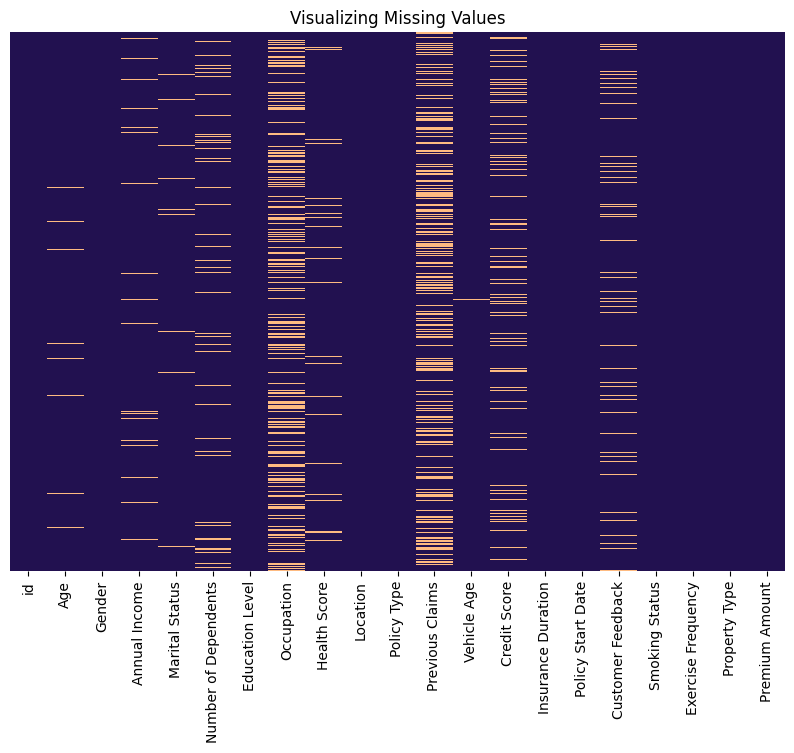

In [6]:
# 🧹 Data Cleaning Insights
plt.figure(figsize=(10,7))
plt.title("Visualizing Missing Values")
sns.heatmap(train_df.isnull(), cbar=False, cmap=sns.color_palette('magma'), yticklabels=False);
plt.show()

>**From the above, we see that Occupation and Previous Claims are the features with the highest percentage of missing values.  
> Next, we check for potential duplicates.**

In [3]:
#checking for potential duplicates
print(f"There are {sum(train_df.duplicated())} duplicated rows in the train data frame.")
print(f"After dropping the 'Premium Amount' column, there are {sum(train_df.drop(columns=['Premium Amount']).duplicated())} duplicated rows in the train data frame.")
print(f"There are {sum(test_df.duplicated())} duplicated rows in the test data frame.")


There are 0 duplicated rows in the train data frame.
After dropping the 'Premium Amount' column, there are 0 duplicated rows in the train data frame.
There are 0 duplicated rows in the test data frame.


**Finally, we check if there are any observations that appear in both the train and test data frames.**

In [8]:
temp_train = train_df.drop(columns=['Premium Amount'], axis=1)
temp_test = test_df

inner_join = pd.merge(temp_train, temp_test)
print(f"There are {len(inner_join)} observations that appear in both the train and test data frames")
#used to identify and count the overlapping observations (e.g., customers or product information) between the train and test DataFrames.

There are 0 observations that appear in both the train and test data frames


In [4]:
# Select categorical and numerical columns (initial)
target_column = "Premium Amount"
categorical_columns = train_df.select_dtypes(include=['object']).columns
numerical_columns = train_df.select_dtypes(exclude=['object']).columns


# Print out column information
print("Target Column:", target_column)
print("\nCategorical Columns:\n",categorical_columns.tolist())
print("\nNumerical Columns:\n",numerical_columns.tolist())
numerical_columns= numerical_columns.tolist()
categorical_columns = categorical_columns.tolist()

Target Column: Premium Amount

Categorical Columns:
 ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Policy Start Date', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']

Numerical Columns:
 ['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount']


## 📊 Descriptive Statistics

In [10]:
train_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,1200000.0,599999.50,346410.31,0.00,299999.75,599999.50,899999.25,1199999.00
Age,1181295.0,41.15,13.54,18.00,30.00,41.00,53.00,64.00
Annual Income,1155051.0,32745.22,32179.51,1.00,8001.00,23911.00,44634.00,149997.00
Number of Dependents,1090328.0,2.01,1.42,0.00,1.00,2.00,3.00,4.00
Health Score,1125924.0,25.61,12.20,2.01,15.92,24.58,34.53,58.98
Previous Claims,835971.0,1.00,0.98,0.00,0.00,1.00,2.00,9.00
Vehicle Age,1199994.0,9.57,5.78,0.00,5.00,10.00,15.00,19.00
Credit Score,1062118.0,592.92,149.98,300.00,468.00,595.00,721.00,849.00
Insurance Duration,1199999.0,5.02,2.59,1.00,3.00,5.00,7.00,9.00
Premium Amount,1200000.0,1102.54,865.00,20.00,514.00,872.00,1509.00,4999.00


In [11]:
for column in categorical_columns:
    num_unique = train_df[column].nunique()
    print(f"'{column}' has {num_unique} unique categories.")

'Gender' has 2 unique categories.
'Marital Status' has 3 unique categories.
'Education Level' has 4 unique categories.
'Occupation' has 3 unique categories.
'Location' has 3 unique categories.
'Policy Type' has 3 unique categories.
'Policy Start Date' has 167381 unique categories.
'Customer Feedback' has 3 unique categories.
'Smoking Status' has 2 unique categories.
'Exercise Frequency' has 4 unique categories.
'Property Type' has 3 unique categories.


In [12]:
# Print top 5 unique value counts for each categorical column
for column in categorical_columns:
    print(f"\nTop value counts in '{column}':\n{train_df[column].value_counts().head(5)}")


Top value counts in 'Gender':
Gender
Male      602571
Female    597429
Name: count, dtype: int64

Top value counts in 'Marital Status':
Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64

Top value counts in 'Education Level':
Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64

Top value counts in 'Occupation':
Occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64

Top value counts in 'Location':
Location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64

Top value counts in 'Policy Type':
Policy Type
Premium          401846
Comprehensive    399600
Basic            398554
Name: count, dtype: int64

Top value counts in 'Policy Start Date':
Policy Start Date
2020-02-08 15:21:39.134960    142
2023-08-13 15:21:39.155231    137
2022-02-02 15:21:39.134960    137
2022-08-30 15:21:3

In [13]:
print("The mean of columns:")
print(train_df[numerical_columns].mean())

print("\nThe std dev of columns:")
print(train_df[numerical_columns].std())

print("\nThe skewness of columns:")
print(train_df[numerical_columns].skew().round(3))

The mean of columns:
id                      599999.500000
Age                         41.145563
Annual Income            32745.217777
Number of Dependents         2.009934
Health Score                25.613908
Previous Claims              1.002689
Vehicle Age                  9.569889
Credit Score               592.924350
Insurance Duration           5.018219
Premium Amount            1102.544822
dtype: float64

The std dev of columns:
id                      346410.305851
Age                         13.539950
Annual Income            32179.506124
Number of Dependents         1.417338
Health Score                12.203462
Previous Claims              0.982840
Vehicle Age                  5.776189
Credit Score               149.981945
Insurance Duration           2.594331
Premium Amount             864.998859
dtype: float64

The skewness of columns:
id                      0.000
Age                    -0.013
Annual Income           1.470
Number of Dependents   -0.013
Health Score      


**Verilerden Çıkarılabilecek Sonuçlar:**
- ***Gelir ve Sigorta Primi Değişkenliği:*** Yıllık gelir ve sigorta primi ücretleri hem yüksek standart sapmaya hem de pozitif çarpıklığa sahip, bu da birkaç yüksek değer nedeniyle dağılımın dengesiz olduğunu gösterir.
- ***Yaş Verileri:*** Yaş dağılımı oldukça dengeli ve standart sapması da nispeten düşük. Çarpıklığı(-0,20) oldukça düşük yani dengeli.
- ***Önceki Talepler:*** Çoğu kişi az talepte bulunmuş, ancak az sayıda kişi çok fazla talepte bulunmuş olabilir (pozitif çarpıklık).


## 🖼️ Visual Exploration


<Axes: xlabel='Premium Amount', ylabel='Count'>

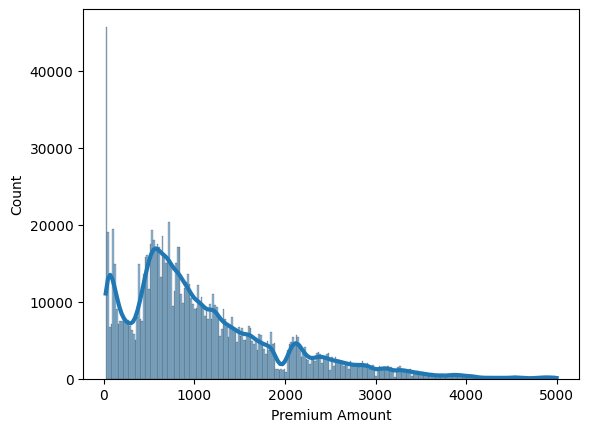

In [14]:
# First we start exploration with the "Premium amount" (target) column
sns.histplot(x=train_df["Premium Amount"],kde=True, line_kws={"linewidth" : 3})

From the above, we see that the distribution is tri-modal and right-skewed.  
Next, we explore potential relationships between the input features and Premium Amount

#### **Numerical Feature Analysis**

In [15]:
numerical_columns

['id',
 'Age',
 'Annual Income',
 'Number of Dependents',
 'Health Score',
 'Previous Claims',
 'Vehicle Age',
 'Credit Score',
 'Insurance Duration',
 'Premium Amount']

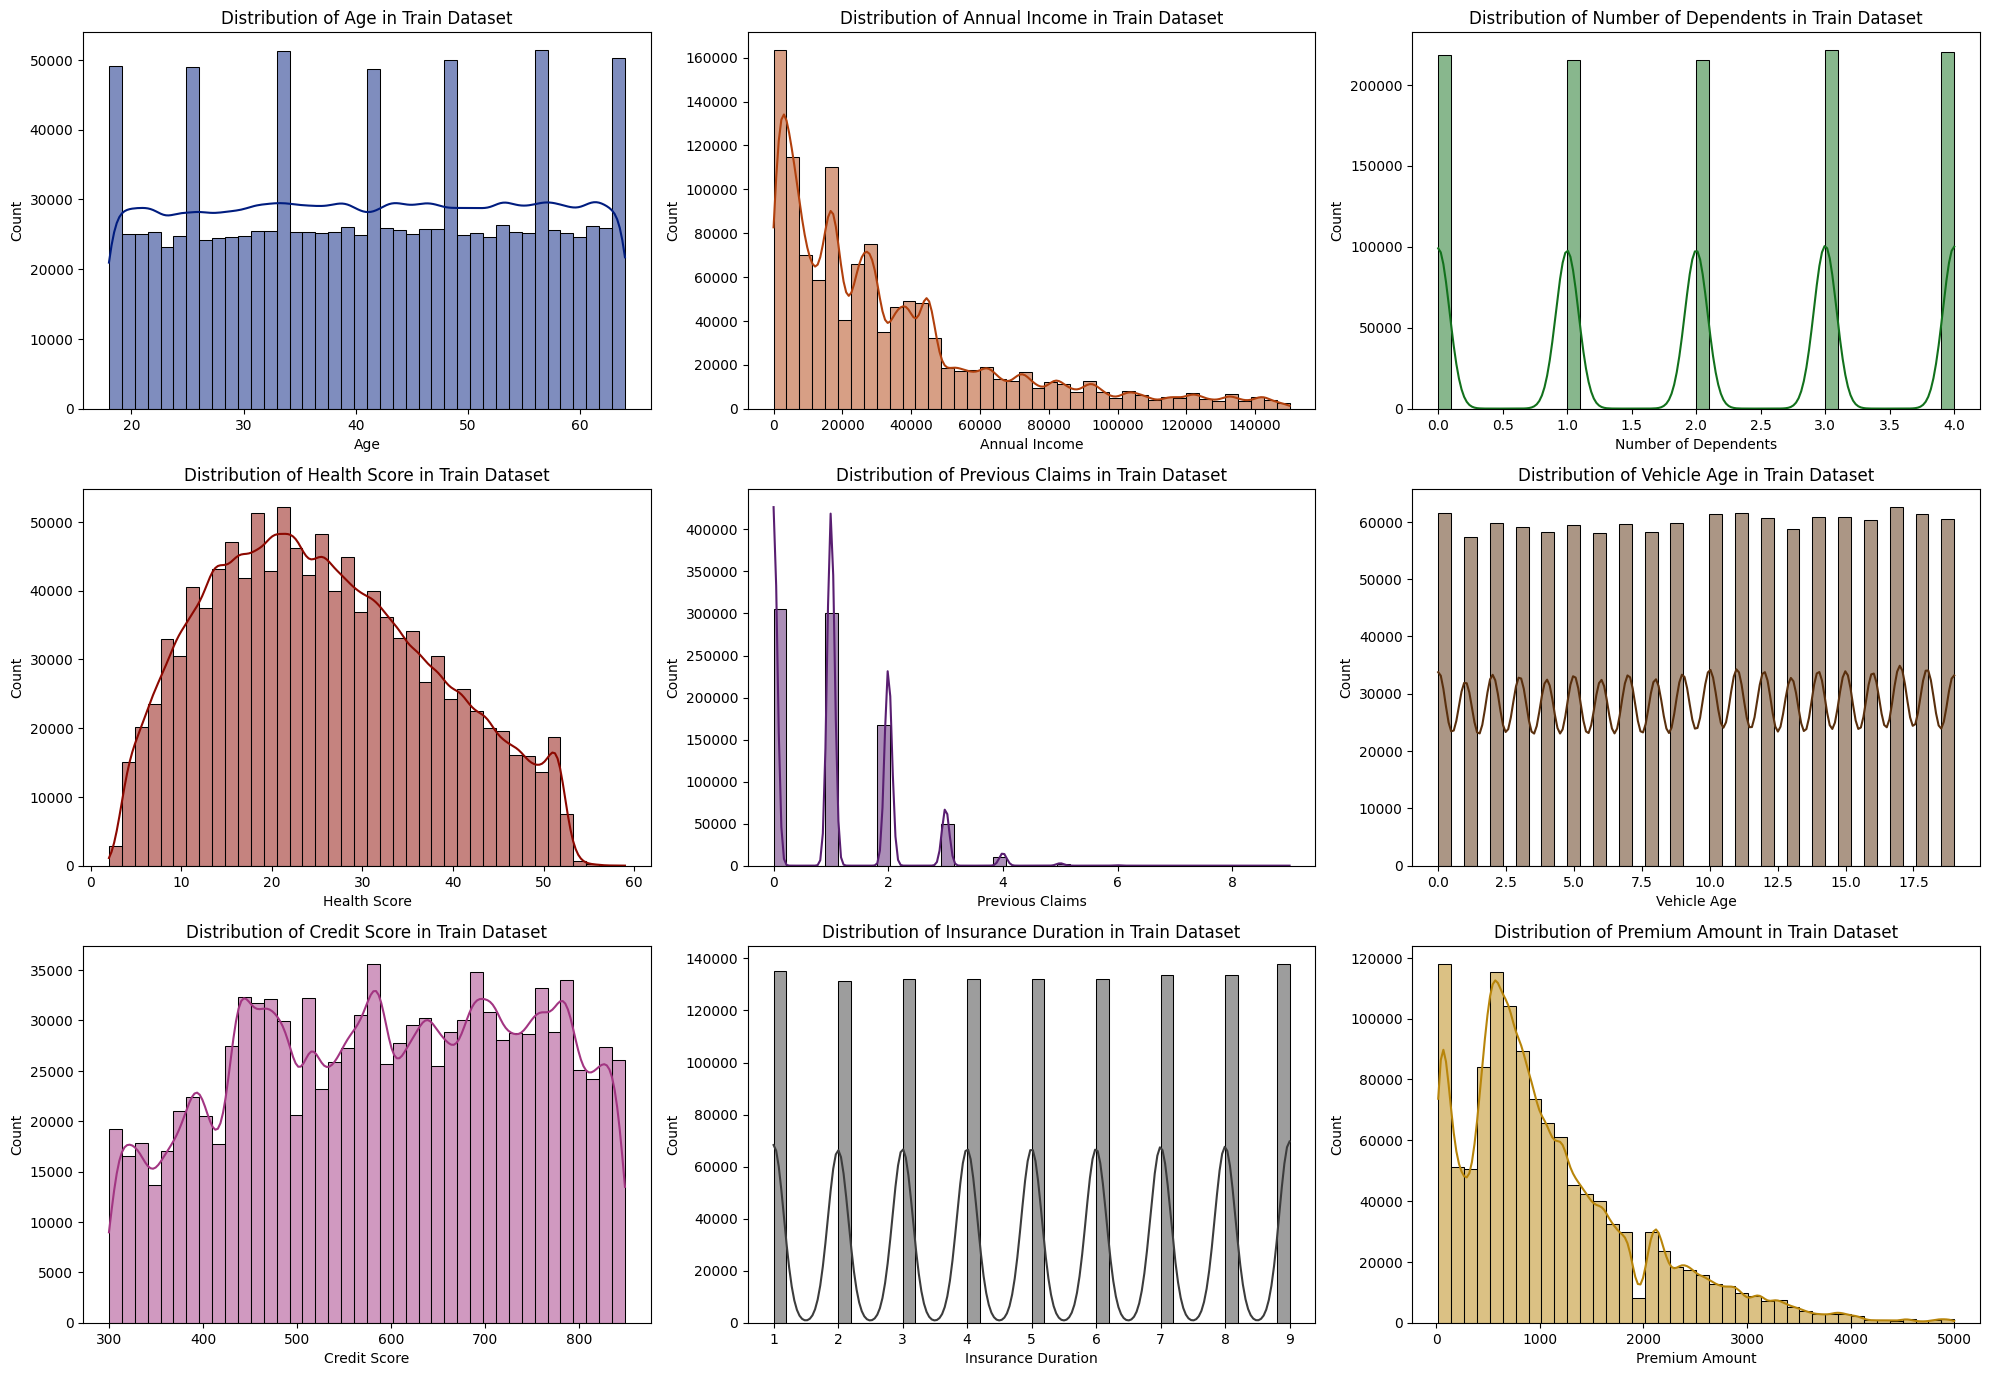

In [16]:
# We were determined the "numerical_columns" before
samp_col = [col for col in numerical_columns if col != 'id']
palette = sns.color_palette('dark', len(numerical_columns))

fig, axes = plt.subplots(len(numerical_columns)//3 +1 ,3,figsize=(20, 18))
axes = axes.flatten()  # Subplot'ları tek boyutlu bir liste haline getir


# histogram plot for all numeric columns
for i, col in enumerate(samp_col): 
    sns.histplot(x=train_df[col], kde=True, bins=40, ax=axes[i],color=palette[i])  # ax ile subplot'a ekle
    axes[i].set_title(f'Distribution of {col} in Train Dataset')
    axes[i].set_xlabel(col)

# remove unused axes if necessary 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()



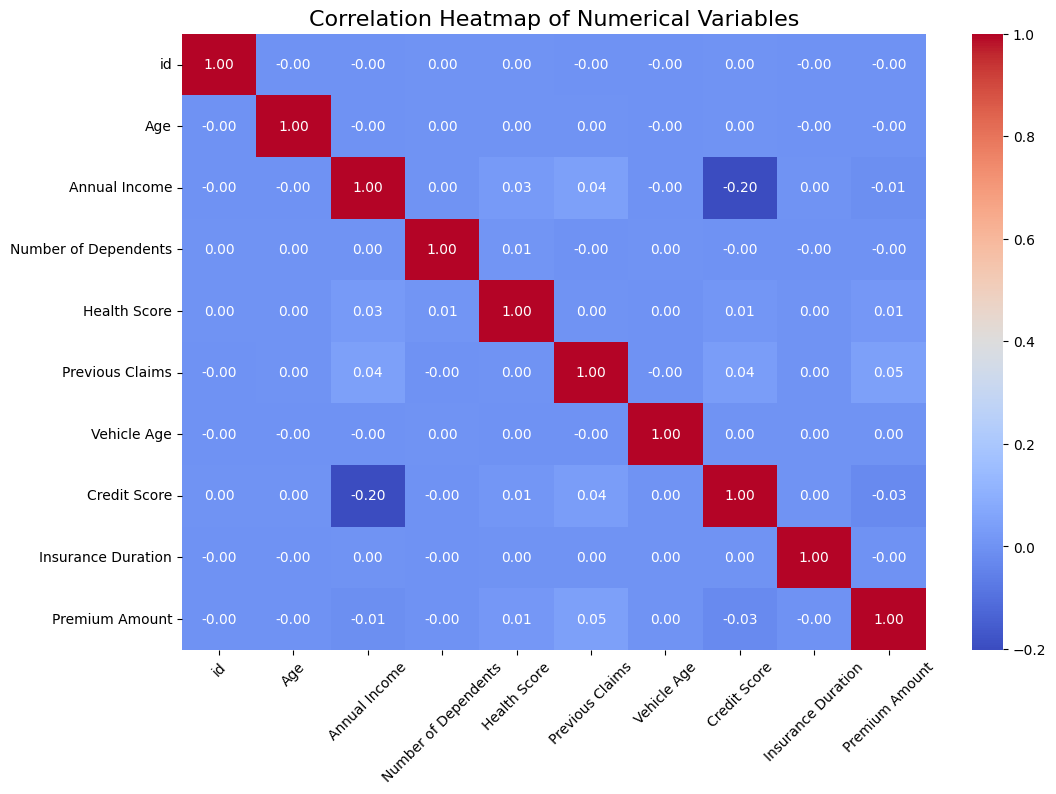

In [17]:
corr_matrix = train_df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.xticks(rotation=45)
plt.show()

#### **Categorical Feature Analysis**

In [18]:
categorical_columns

['Gender',
 'Marital Status',
 'Education Level',
 'Occupation',
 'Location',
 'Policy Type',
 'Policy Start Date',
 'Customer Feedback',
 'Smoking Status',
 'Exercise Frequency',
 'Property Type']

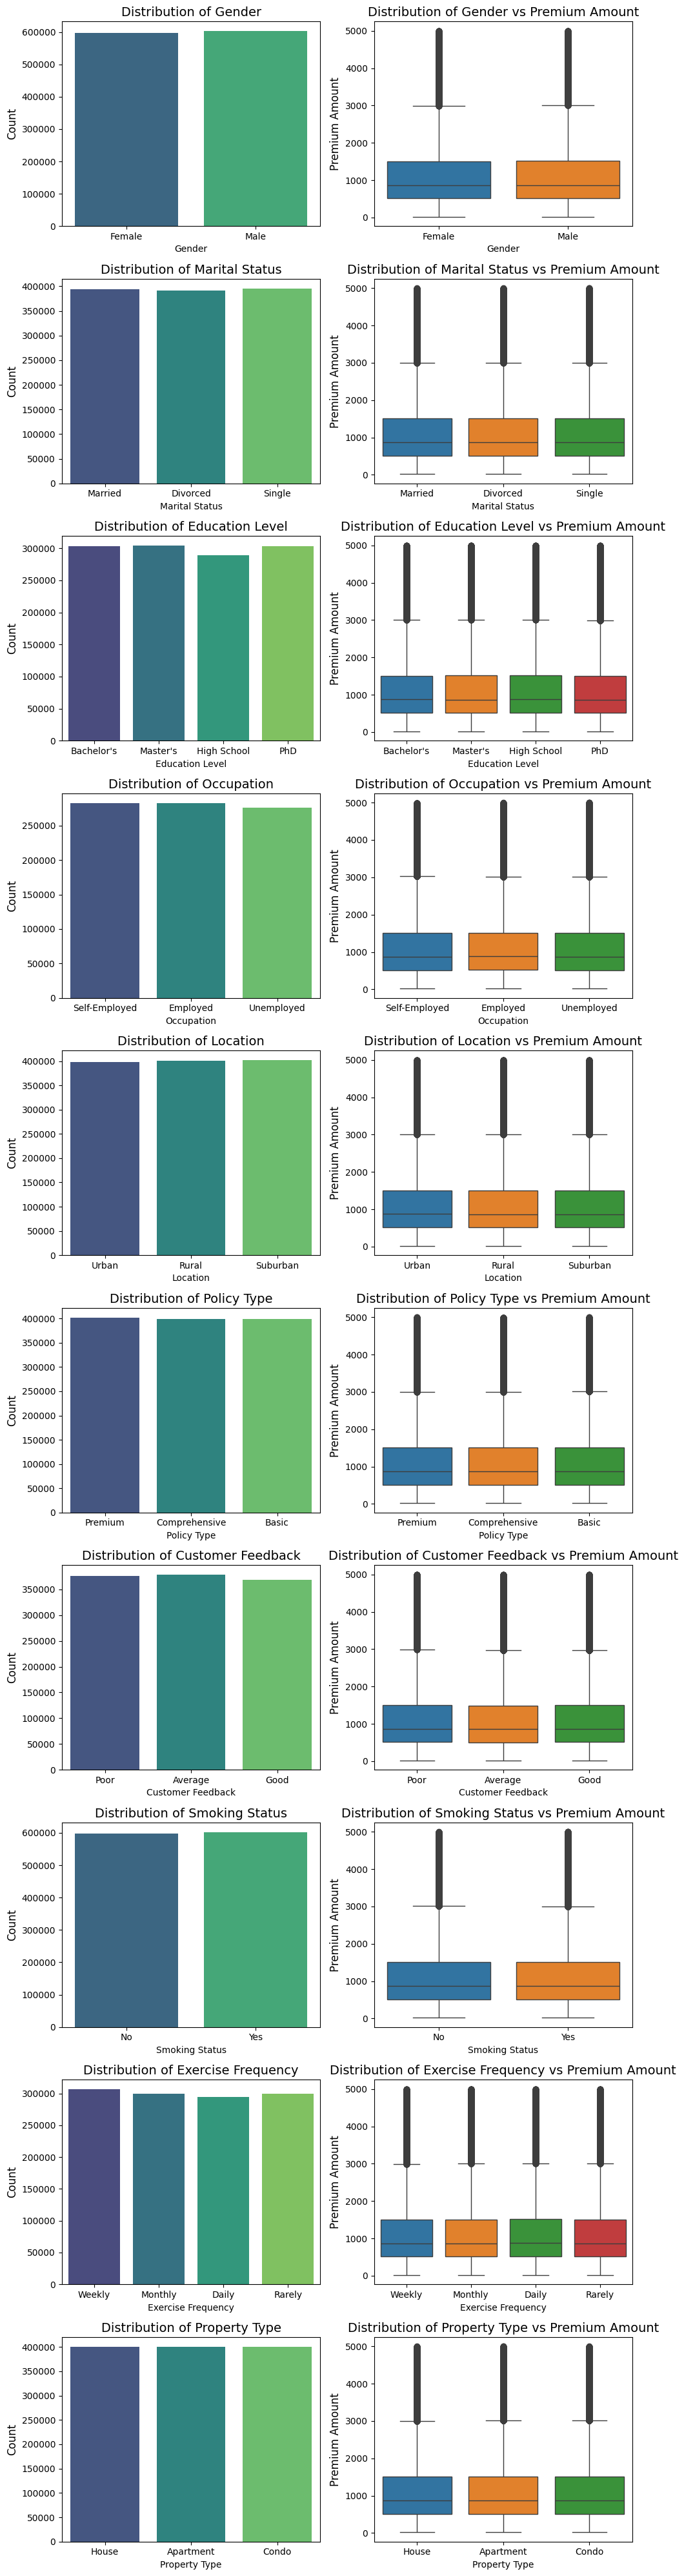

In [19]:
filtered_columns = [col for col in categorical_columns if col != 'Policy Start Date']
palette = sns.color_palette("tab10",len(filtered_columns))

fig, axes = plt.subplots(len(filtered_columns) ,2,figsize=(10,40))
#axes = axes.flatten()  # Subplot'ları tek boyutlu bir liste haline getir

for i,col in enumerate(filtered_columns):
    #countplot
    sns.countplot(data=train_df,x=col, ax=axes[i,0], palette="viridis")
    axes[i, 0].set_title(f'Distribution of {col}', fontsize=14)
    axes[i, 0].set_xlabel(col, fontsize=10)
    axes[i, 0].set_ylabel('Count', fontsize=12)
    
    #boxplot
    sns.boxplot(data=train_df, x=col, y=target_column, ax=axes[i,1] ,palette=palette)
    axes[i, 1].set_title(f'Distribution of {col} vs Premium Amount', fontsize=14)
    axes[i, 1].set_xlabel(col, fontsize=10)
    axes[i, 1].set_ylabel(target_column, fontsize=12)
    
plt.tight_layout()  
plt.show()

From the above charts, there is no interesting relationship that can be exploited for modeling purposes.  
Based on the different considered chart, the data seems pretty random.

# Data Preprocessing

Data preprocessing is a crucial step in preparing the dataset for analysis and modeling.   
It ensures the data is clean, consistent, and ready for machine learning algorithms.

🔍 ***Objectives***
- Handle missing values.
- Encode categorical features.
- Standardize or normalize numerical features.
- Create new features or transform existing ones if necessary.

#### Feature Transformation: Date Handling

In [5]:
def date(df):

    df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])
    df['Year'] = df['Policy Start Date'].dt.year
    df['Day'] = df['Policy Start Date'].dt.day
    df['Month'] = df['Policy Start Date'].dt.month
    df['Month_name'] = df['Policy Start Date'].dt.month_name()
    #df['Day_of_week'] = df['Policy Start Date'].dt.day_name()
    df['Week'] = df['Policy Start Date'].dt.isocalendar().week

    df.drop('Policy Start Date', axis=1, inplace=True)


    return df


train_df= date(train_df)
test_df= date(test_df)


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [8]:
def feature_processing(df):

    df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
    df['Smoking Status'] = df['Smoking Status'].map({'No': 0, 'Yes': 1})
    df['Previous Claims'] = df['Previous Claims'].clip(None, 8)
    return df
    
train_df= feature_processing(train_df)
test_df= feature_processing(test_df)

cat_cols = ['Marital Status', 'Education Level',
 'Occupation', 'Location', 'Policy Type',
 'Customer Feedback', 'Exercise Frequency', 'Property Type']

for col in cat_cols:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')



> In this step, we split the training dataset into:

>**Features (X):** The independent variables used to predict the target.  
>**Target (y):** The dependent variable that the model will learn to predict.

In [9]:
train_df.head(5)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Year,Day,Month,Month_name,Week
0,0,19.0,0,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,Poor,0,Weekly,House,2869.0,2023,23,12,December,51
1,1,39.0,0,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,Average,1,Monthly,House,1483.0,2023,12,6,June,24
2,2,23.0,1,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,Good,1,Weekly,House,567.0,2023,30,9,September,39
3,3,21.0,1,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,Poor,1,Daily,Apartment,765.0,2024,12,6,June,24
4,4,21.0,1,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,Poor,1,Weekly,House,2022.0,2021,1,12,December,48


In [13]:
# Split train data into features and target
X = train_df.drop(columns=[target_column, 'id',],axis=1)
y = train_df[target_column]

In [14]:
tmp_cat_col = train_df.select_dtypes(include=['object','category']).columns
tmp_num_col = train_df.select_dtypes(exclude=['object','category']).columns


In [15]:
def adjust_column(column):
    for i in column:
        if i not in X.columns:
            column= column.drop(i)
    return column
    
            

In [18]:
cat_col = adjust_column(tmp_cat_col)
num_col= adjust_column(tmp_num_col)

In [13]:
num_col

Index(['Age', 'Gender', 'Annual Income', 'Number of Dependents',
       'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score',
       'Insurance Duration', 'Smoking Status', 'Year', 'Month', 'Week'],
      dtype='object')

#### Handle Missing Values & Preprocessing Pipeline

In this step, we handle missing values and set up a preprocessing pipeline to prepare the data for machine learning.

🔍 What We Did
Missing Values Imputation:

Numerical Features:
Replaced missing values with the mean of the respective columns.
Categorical Features:
Replaced missing values with the constant value "Unknown".
Feature Scaling & Encoding:

Numerical Features:
Standardized using StandardScaler to normalize the values.
Categorical Features:
One-Hot Encoded to handle categorical variables as numerical inputs.
Combined Using a ColumnTransformer:

Applied preprocessing selectively to numerical and categorical features using a single, unified pipeline.

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer  # Eksik değerleri doldurmak için
from sklearn.preprocessing import StandardScaler  # Sayısal veriyi ölçeklemek için
from sklearn.preprocessing import OneHotEncoder  # Kategorik veriyi kodlamak için
from sklearn.compose import ColumnTransformer


# Preprocessing pipeline for numerical features
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())                       # Scale numerical features
])

# Preprocessing pipeline for categorical features
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='unknown')),  # Handle missing valuescons
    ('onehot', OneHotEncoder(handle_unknown='ignore'))                      # Encode categorical features
])

# Combine pipelines into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_col),
        ('cat', cat_pipeline, cat_col)
    ]
)

# Preprocess train and test data
X_processed = preprocessor.fit_transform(X)
test_processed = preprocessor.transform(test_df.drop(columns=['id']))

In [20]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=37)

# Model Training

Training the model is the core step in any machine learning pipeline. Here, we use the processed features and target variable to fit a predictive model and evaluate its performance on a validation set.

***🔍 Objectives***    

- Train the model using the training dataset (X_train, y_train).  
- Evaluate the model on the validation set (X_val, y_val).   
- Optimize the model's parameters to improve its performance.   

## 🔧 Hyperparameter Optimization with Optuna

Optuna is a powerful library for hyperparameter optimization.   
In this step, we use Optuna to fine-tune the hyperparameters of a LightGBM model to achieve optimal performance.

In [26]:
import optuna
import lightgbm as lgb
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_log_error




# Define Optuna optimization function
def objective(trial):
    # Define parameter search space
    param = {
        "objective": "regression",
        "metric": "rmse",
        "boosting_type":trial.suggest_categorical("boosting_type", ["gbdt", "dart"]),
        "num_leaves": trial.suggest_int("num_leaves", 200, 512),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
        "feature_fraction": trial.suggest_uniform("feature_fraction", 0.6, 1.0),
        "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.6, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 5, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 100),
        "max_depth": trial.suggest_int("max_depth", -1, 16),  # -1 means no limit
        "lambda_l1": trial.suggest_loguniform("lambda_l1", 1e-4, 10.0),
        "lambda_l2": trial.suggest_loguniform("lambda_l2", 1e-4, 10.0),
        "device_type": "gpu",  # Enable GPU support
        "seed" : 37

    }

    # Create a LightGBM dataset
    dtrain = lgb.Dataset(X_train, label=y_train)
    dval = lgb.Dataset(X_val, label=y_val, reference=dtrain)

    # Train LightGBM model
    #model = lgb.train(param, dtrain, valid_sets=[dval], num_boost_round=1000, early_stopping_rounds=50, verbose_eval=False)


    model = lgb.train(
    param,
    dtrain,
    valid_sets=[dval])
    #num_boost_round=500,
    #callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(20)])
    
    # Calculate Rmsle and predict
    y_pred = model.predict(X_val, num_iteration=model.best_iteration)
    rmsle = np.sqrt(mean_squared_log_error(y_val, np.maximum(y_pred, 0)))


    return rmsle

# Run Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=5)

[I 2024-12-10 12:46:34,682] A new study created in memory with name: no-name-542c6002-a524-4adc-8184-6b2085a38ccf


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1049
[LightGBM] [Info] Number of data points in the train set: 960000, number of used features: 55
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 23 dense feature groups (21.97 MB) transferred to GPU in 0.029597 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1102.454696
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 23 dense feature groups (20.59 MB) transferred to GPU in 0.026863 secs. 0 sparse feature groups
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-12-10 12:46:39,760] Trial 0 finished with value: 1.4028488897060847 and parameters: {'boosting_type': 'dart', 'num_leaves': 313, 'learning_rate': 0.0003204777059800613, 'feature_fraction': 0.7432623263618425, 'bagging_fraction': 0.936654572934584, 'bagging_freq': 5, 'min_data_in_leaf': 55, 'max_depth': 2, 'lambda_l1': 0.3628331756884495, 'lambda_l2': 2.36707554995308}. Best is trial 0 with value: 1.4028488897060847.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1049
[LightGBM] [Info] Number of data points in the train set: 960000, number of used features: 55
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 23 dense feature groups (21.97 MB) transferred to GPU in 0.027203 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1102.454696
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 23 dense feature groups (19.24 MB) transferred to GPU in 0.024183 secs. 0 sparse feature groups
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-12-10 12:46:48,682] Trial 1 finished with value: 1.0915514211387183 and parameters: {'boosting_type': 'dart', 'num_leaves': 248, 'learning_rate': 0.05815161496914569, 'feature_fraction': 0.9613540521120864, 'bagging_fraction': 0.8749803355299814, 'bagging_freq': 6, 'min_data_in_leaf': 48, 'max_depth': 5, 'lambda_l1': 4.277976438716461, 'lambda_l2': 0.0006468938326306755}. Best is trial 1 with value: 1.0915514211387183.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1049
[LightGBM] [Info] Number of data points in the train set: 960000, number of used features: 55
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 23 dense feature groups (21.97 MB) transferred to GPU in 0.027701 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1102.454696
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 23 dense feature groups (17.07 MB) transferred to GPU in 0.021259 secs. 0 sparse feature groups
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 23 dense feature groups (17.07 MB) transferred to GPU in 0.021542 secs. 0 sparse feature groups
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 23 dense feature groups (17.

[I 2024-12-10 12:47:04,635] Trial 2 finished with value: 1.1350235374848583 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 386, 'learning_rate': 0.04043596426651911, 'feature_fraction': 0.8336581736059783, 'bagging_fraction': 0.7769044744784056, 'bagging_freq': 6, 'min_data_in_leaf': 67, 'max_depth': 11, 'lambda_l1': 0.00011370538702894006, 'lambda_l2': 0.0004201756357925698}. Best is trial 1 with value: 1.0915514211387183.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1049
[LightGBM] [Info] Number of data points in the train set: 960000, number of used features: 55
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 23 dense feature groups (21.97 MB) transferred to GPU in 0.028259 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1102.454696
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 23 dense feature groups (19.46 MB) transferred to GPU in 0.024832 secs. 0 sparse feature groups
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 23 dense feature groups (19.46 MB) transferred to GPU in 0.022013 secs. 0 sparse feature groups
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Si

[I 2024-12-10 12:47:31,204] Trial 3 finished with value: 1.1692234775720716 and parameters: {'boosting_type': 'dart', 'num_leaves': 438, 'learning_rate': 0.00844500565579681, 'feature_fraction': 0.622794779105256, 'bagging_fraction': 0.8852557713339624, 'bagging_freq': 10, 'min_data_in_leaf': 20, 'max_depth': 0, 'lambda_l1': 0.19856807172636434, 'lambda_l2': 8.687304659245966}. Best is trial 1 with value: 1.0915514211387183.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1049
[LightGBM] [Info] Number of data points in the train set: 960000, number of used features: 55
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 23 dense feature groups (21.97 MB) transferred to GPU in 0.027420 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1102.454696
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 23 dense feature groups (14.48 MB) transferred to GPU in 0.018380 secs. 0 sparse feature groups
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 23 dense feature groups (14.48 MB) transferred to GPU in 0.016786 secs. 0 sparse feature groups
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 23 dense feature groups (14.

[I 2024-12-10 12:47:49,821] Trial 4 finished with value: 1.3757559354391995 and parameters: {'boosting_type': 'dart', 'num_leaves': 206, 'learning_rate': 0.0008290348302032207, 'feature_fraction': 0.7985694151037904, 'bagging_fraction': 0.6589955613128218, 'bagging_freq': 6, 'min_data_in_leaf': 27, 'max_depth': 15, 'lambda_l1': 0.000531197644532299, 'lambda_l2': 0.14684913321702764}. Best is trial 1 with value: 1.0915514211387183.


In [27]:
# En iyi hiperparametreler ve sonuç
print("Best trial:")
print(f"  Value (RMSLE): {study.best_trial.value}")
print("  Params: ")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")

Best trial:
  Value (RMSLE): 1.0915514211387183
  Params: 
    boosting_type: dart
    num_leaves: 248
    learning_rate: 0.05815161496914569
    feature_fraction: 0.9613540521120864
    bagging_fraction: 0.8749803355299814
    bagging_freq: 6
    min_data_in_leaf: 48
    max_depth: 5
    lambda_l1: 4.277976438716461
    lambda_l2: 0.0006468938326306755


***Best Hyperparameters***  
After running the hyperparameter optimization process with Optuna, the best combination of parameters was identified. These parameters will be used to train the final LightGBM model.



In [ ]:
# Initialize or update the best_params dictionary

best_params = {
    "boosting_type": "dart"
    "num_leaves": 248
    "learning_rate": 0.05815161496914569
    "feature_fraction": 0.9613540521120864
    "bagging_fraction": 0.8749803355299814
    "bagging_freq": 6
    "min_data_in_leaf": 48
    "max_depth": 5
    "lambda_l1": 4.277976438716461
    "lambda_l2": 0.0006468938326306755
    
}

## 🚀 Train Final Model with Best Parameters


In [30]:
# Train final model with best parameters
best_params = study.best_params

final_model = lgb.train(
    best_params,
    lgb.Dataset(X_processed, label=y),
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1049
[LightGBM] [Info] Number of data points in the train set: 1200000, number of used features: 55
[LightGBM] [Info] Start training from score 1102.544822
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## Generate Predictions & Prepare Submission


Finally, we use the trained model to predict outcomes on the test set and format the results into a submission file for the competition.

In [35]:
# Make predictions on the test set
test_predictions = final_model.predict(test_processed, num_iteration=final_model.best_iteration)

# Prepare submission file
submission = pd.DataFrame({'id': test_df['id'], 'Premium Amount': test_predictions})
submission.to_csv("submission.csv", index=False)